In [1]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
ds1 = pd.read_csv('../data/external/BankAnalysis.csv') 

# New Section

In [5]:
ds1.head()

,Unnamed: 0,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome,duration(in minutes)
0,0,59.0,0,0.908149,1,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
1,1,56.0,0,-0.794565,0,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
2,2,41.0,0,0.113105,1,0,5,1,-1.0,0,1,5,1,2,1,1,1,17
3,3,55.0,0,1.006696,1,0,5,1,-1.0,0,1,4,1,2,1,1,1,9
4,4,54.0,0,-0.691572,0,0,5,2,-1.0,0,1,7,1,4,1,1,1,11


In [7]:
ds1.shape

(11162, 18)

In [8]:
x = ds1.drop('deposit',axis = 1) 
y = ds1['deposit']

In [9]:
# creating the object

ec = ExtraTreesClassifier()

In [10]:
ec.fit(x,y) # applying the classifier

ExtraTreesClassifier()

In [11]:
ec.feature_importances_

array([0.62501334, 0.01494478, 0.00064263, 0.0138759 , 0.02179294,
       0.00624505, 0.0149049 , 0.0105157 , 0.024505  , 0.00472117,
       0.01326944, 0.0074232 , 0.00777611, 0.02648381, 0.03828046,
       0.03373192, 0.13587364])

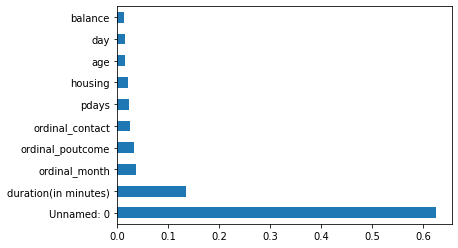

In [12]:
# plotting the scores and values

f_s = pd.Series(ec.feature_importances_, index = x.columns, name = 'features')
fs = f_s.nlargest(10).plot(kind = 'barh')

In [13]:
fss = f_s.nlargest(10) # copying the series

In [14]:
ds2 = ds1[fss.index] # making a data frame of only selected features

In [15]:
ds2.head() # seeing the results

,Unnamed: 0,duration(in minutes),ordinal_month,ordinal_poutcome,ordinal_contact,pdays,housing,age,day,balance
0,0,17,1,1,1,-1.0,1,59.0,5,0.908149
1,1,17,1,1,1,-1.0,0,56.0,5,-0.794565
2,2,17,1,1,1,-1.0,1,41.0,5,0.113105
3,3,9,1,1,1,-1.0,1,55.0,5,1.006696
4,4,11,1,1,1,-1.0,0,54.0,5,-0.691572


In [16]:
# separating x and y
X = ds2[:] 
Y = ds1['deposit']

In [17]:
# splitting data in train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:

def dt(x_train,y_train, x_test, y_test):

    dct = DecisionTreeClassifier()
    m_sv = dct.fit(x_train,y_train)
    y_hat = m_sv.predict(x_test)
    print('accuracy of decison tree is:',accuracy_score(y_test, y_hat))
    print(classification_report(y_test, y_hat))
    cm = confusion_matrix(y_test, y_hat)
    print(cm)


In [19]:
dt(x_train,y_train,x_test,y_test)

accuracy of decison tree is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      1.00      1.00      1065

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233

[[1168    0]
 [   0 1065]]


### If you dump complete function, then you have to call complete model

In [24]:
def rf(x_train, y_train, x_test, y_test):

    rff = RandomForestClassifier()
    rf1 = rff.fit(x_train,y_train)
    y_hat = rf1.predict(x_test)
    print('accuracy of random forest is',accuracy_score(y_test, y_hat))
    print(classification_report(y_test, y_hat))
    cm = confusion_matrix(y_test, y_hat)
    with open('saved_rf_model.pkl', 'wb') as wr:
      pickle.dump(rf1, wr)
    return rf1
        

In [25]:
rf(x_train,y_train,x_test,y_test)

accuracy of random forest is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1168
           1       1.00      1.00      1.00      1065

    accuracy                           1.00      2233
   macro avg       1.00      1.00      1.00      2233
weighted avg       1.00      1.00      1.00      2233



RandomForestClassifier()

In [26]:
x_2 = x_train[1:2]
y_2 = y_train[1:2]

In [30]:
model =  pickle.load(open('saved_rf_model.pkl', 'rb'))
#model =  pickle.load(open('saved_rf.pkl', 'rb'))
model.predict(x_2)

array([1], dtype=int64)

In [28]:
y_2

2843    1
Name: deposit, dtype: int64